In [49]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [50]:
#Read Data
path = "./Resources/loan_data_cleaned.csv"
data = pd.read_csv(path)

#Reseting Index to Loan ID
data.set_index('loan_id')

,Unnamed: 0,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,,
1,0,2,Graduate,No,96000,299000,12,778,24000,176000,227000,80000,Approved
2,1,0,Not Graduate,Yes,41000,122000,8,417,27000,22000,88000,33000,Rejected
3,2,3,Graduate,No,91000,297000,20,506,71000,45000,333000,128000,Rejected
4,3,3,Graduate,No,82000,307000,8,467,182000,33000,233000,79000,Rejected
5,4,5,Not Graduate,Yes,98000,242000,20,382,124000,82000,294000,50000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,4264,5,Graduate,Yes,10000,23000,12,317,28000,5000,33000,8000,Rejected
4266,4265,0,Not Graduate,Yes,33000,113000,20,559,42000,29000,110000,19000,Approved
4267,4266,2,Not Graduate,No,65000,239000,18,457,12000,124000,181000,73000,Rejected


### CATEGORICAL DATA

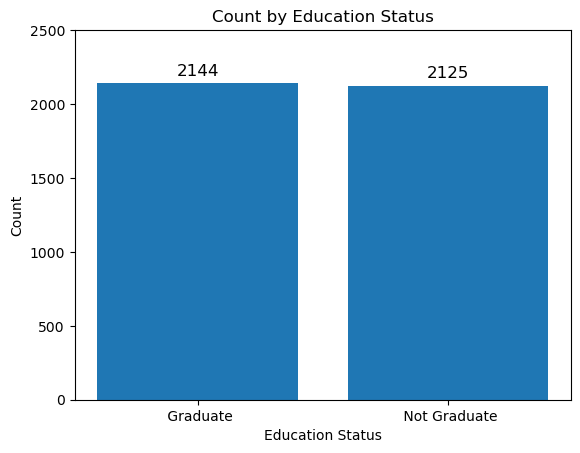

In [51]:
#Graduate Data
data.columns = [col.strip() for col in data.columns]
fig, ax = plt.subplots()

plot = plt.bar(data["education"].unique(), data["education"].value_counts())
for i in range(0,len(data["education"].unique())):
    ax.text(i, data["education"].value_counts()[i] + 50, 
            str(data["education"].value_counts()[i]), 
            ha = 'center', 
            fontsize = 12)

ax.set_ylim([0, 2500])
plt.xlabel("Education Status")
plt.ylabel("Count")
plt.title("Count by Education Status")
plt.show()


Dataset shows equal distribution between individuals with a graduate education and
 those without. Specifically, 2,144 individuals have a graduate degree,
 while a slightly lesser count of 2,125 are not graduates. 
This indicates a balanced representation of education levels in the dataset.

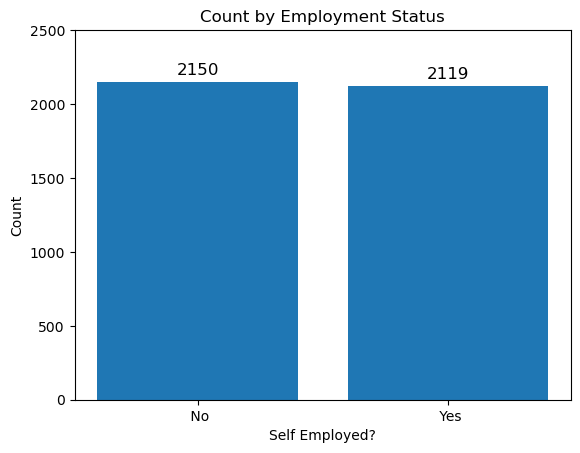

In [52]:
# Strip whitespace from column names
data.columns = [col.strip() for col in data.columns]

# Employment Data
fig, ax = plt.subplots()

# Using the cleaned column names
plot = plt.bar(data["self_employed"].unique(), data["self_employed"].value_counts())
for i in range(0,len(data["self_employed"].unique())):
    ax.text(i, data["self_employed"].value_counts()[i] + 50, 
            str(data["self_employed"].value_counts()[i]), 
            ha = 'center', 
            fontsize = 12)

ax.set_ylim([0, 2500])
plt.xlabel("Self Employed?")
plt.ylabel("Count")
plt.title("Count by Employment Status")
plt.show()


 the employment status is almost evenly distributed between self-employed individuals and others. Specifically, 2,119 individuals identify as self-employed, while slightly more, at 2,150, are not self-employed. This showcases a balanced representation of both employment categories in the dataset.

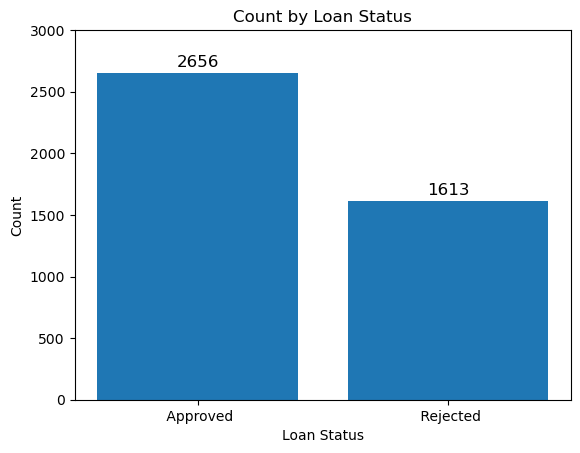

In [53]:
# Loan Status Data
fig, ax = plt.subplots()

# Using the cleaned column names
plot = plt.bar(data["loan_status"].unique(), data["loan_status"].value_counts())
for i in range(0, len(data["loan_status"].unique())):
    ax.text(i, data["loan_status"].value_counts()[i] + 50, 
            str(data["loan_status"].value_counts()[i]), 
            ha = 'center', 
            fontsize = 12)

ax.set_ylim([0, 3000])
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Count by Loan Status")
plt.show()

In the dataset, a majority of loans, totaling 2,656, have been approved, suggesting a strong inclination towards sanctioning loans. However, a significant number, 1,613 to be exact, have been rejected, indicating that many applications still don't fulfill the required criteria for approval.

look deeper into the reasons for rejection and identify potential patterns or commonalities among the rejected applications.

In [54]:
print(data[data["loan_status"] == " Approved"]["cibil_score"].describe())
print(data[data["loan_status"] == " Rejected"]["cibil_score"].describe())

count    2656.000000
mean      703.461973
std       125.249016
min       300.000000
25%       618.000000
50%       711.000000
75%       803.000000
max       900.000000
Name: cibil_score, dtype: float64
count    1613.000000
mean      429.468072
std        78.401752
min       300.000000
25%       364.000000
50%       429.000000
75%       493.000000
max       885.000000
Name: cibil_score, dtype: float64


In [55]:
print(data["cibil_score"].describe())

count    4269.000000
mean      599.936051
std       172.430401
min       300.000000
25%       453.000000
50%       600.000000
75%       748.000000
max       900.000000
Name: cibil_score, dtype: float64


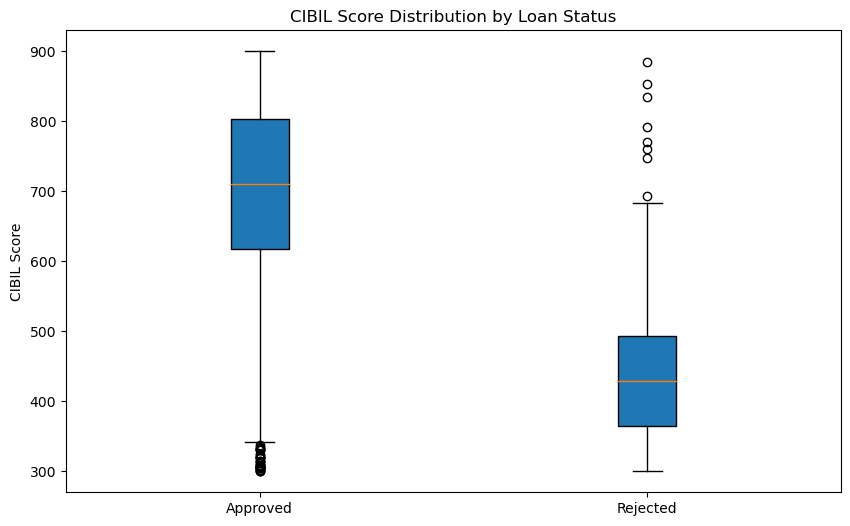

In [56]:
# Box plot of cibil_score by loan_status
plt.figure(figsize=(10,6))

# Using the correct values for loan_status
plt.boxplot([data[data["loan_status"] == " Approved"]["cibil_score"], 
             data[data["loan_status"] == " Rejected"]["cibil_score"]], 
            vert=True, patch_artist=True, labels=["Approved", "Rejected"])

plt.title('CIBIL Score Distribution by Loan Status')
plt.ylabel('CIBIL Score')
plt.show()

Approved loans, the median CIBIL score hovers around 700, with the majority of scores ranging from 600 to 800. Despite this, there are a few outliers with scores as low as 300 to 350, hinting at approvals for unexpectedly low scores. Conversely, Rejected loans predominantly have scores between 350 and 475, with a median near 420. Interestingly, there are outliers with high scores between 700 to 875, suggesting that some high-scoring individuals were not granted loans. Overall, while CIBIL scores generally influence loan decisions, there are exceptions, implying that other factors also play a role in the approval process

CIBIL scores play a impt role in the loan approval process, there are instances where individuals with high scores get rejected and those with relatively lower scores get approved. This suggests other influencing factors in the loan approval process beyond just the CIBIL score.

### NUMERICAL DATA

(array([435., 416., 426., 397., 450., 451., 383., 453., 434., 424.]),
 array([ 2000., 11700., 21400., 31100., 40800., 50500., 60200., 69900.,
        79600., 89300., 99000.]),
 <BarContainer object of 10 artists>)

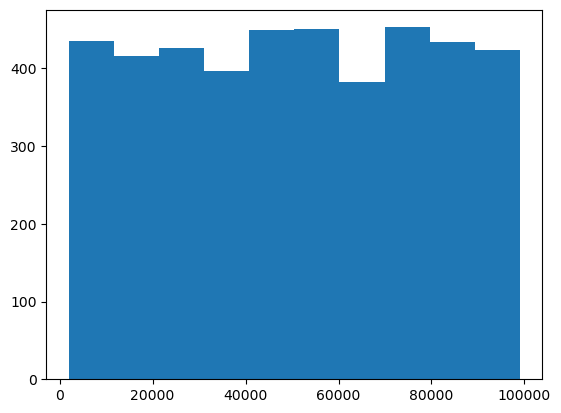

In [57]:
plt.hist(data["income_annum"])


The distribution seems fairly uniform with values spread out across various bins. 
Most incomes are between 2,000 and 99,000, 
and there's no clear skew observed.

(array([568., 560., 624., 586., 607., 521., 352., 275., 131.,  45.]),
 array([  3000.,  42200.,  81400., 120600., 159800., 199000., 238200.,
        277400., 316600., 355800., 395000.]),
 <BarContainer object of 10 artists>)

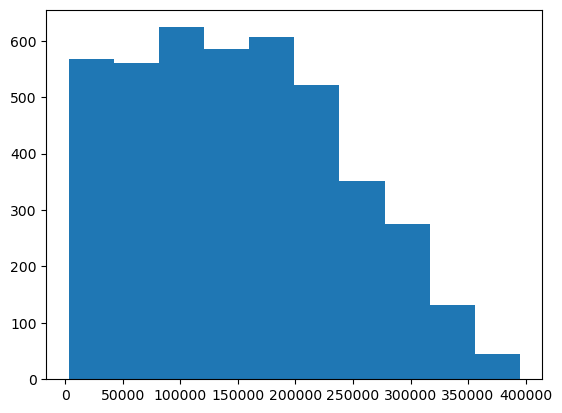

In [58]:
plt.hist(data["loan_amount"])


The data is slightly right-skewed, with more loan amounts in the lower range, 
and a decline in frequency as the loan amount increases

(array([404., 447., 490., 386., 436., 456., 405., 412., 422., 411.]),
 array([ 2. ,  3.8,  5.6,  7.4,  9.2, 11. , 12.8, 14.6, 16.4, 18.2, 20. ]),
 <BarContainer object of 10 artists>)

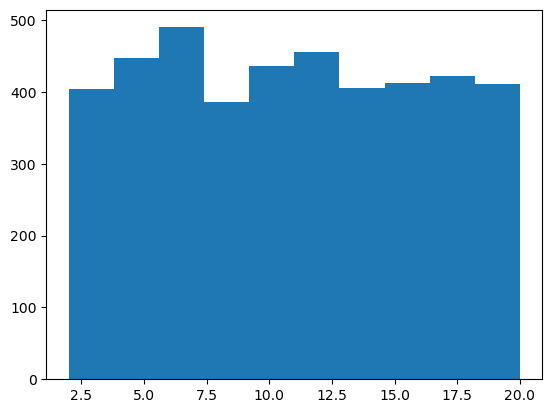

In [59]:
plt.hist(data["loan_term"])

The distribution is uniform. Most loan terms are between 2 and 20. 
This might represent years or months; context is needed.

(array([424., 412., 430., 428., 439., 409., 457., 431., 429., 410.]),
 array([300., 360., 420., 480., 540., 600., 660., 720., 780., 840., 900.]),
 <BarContainer object of 10 artists>)

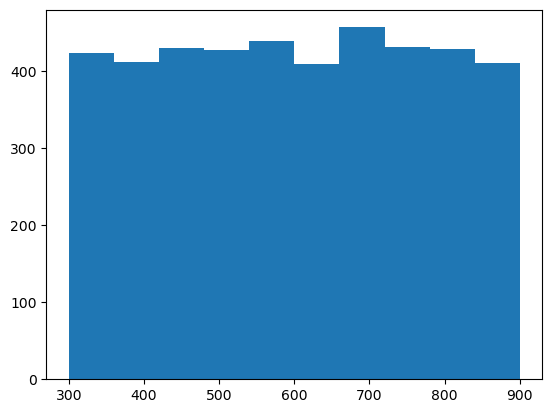

In [60]:
plt.hist(data["cibil_score"])

The data is fairly uniformly spread out between 300 and 900. 
This makes sense given that CIBIL scores usually range from 300 to 900

(array([1302.,  858.,  596.,  480.,  355.,  266.,  160.,  140.,   88.,
          24.]),
 array([ -1000.,  28200.,  57400.,  86600., 115800., 145000., 174200.,
        203400., 232600., 261800., 291000.]),
 <BarContainer object of 10 artists>)

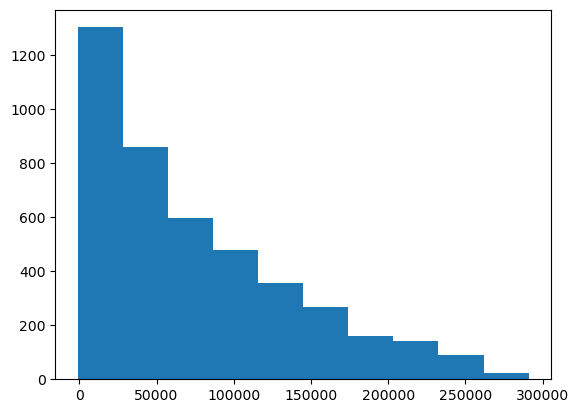

In [61]:
plt.hist(data["residential_assets_value"])

The distribution is right-skewed. Most of the values are at the lower end, and fewer people have very high residential asset values. There's also a negative value 

an outlier or data error that should be checked.

(array([1376.,  814.,  603.,  426.,  346.,  272.,  192.,  129.,   80.,
          31.]),
 array([     0.,  19400.,  38800.,  58200.,  77600.,  97000., 116400.,
        135800., 155200., 174600., 194000.]),
 <BarContainer object of 10 artists>)

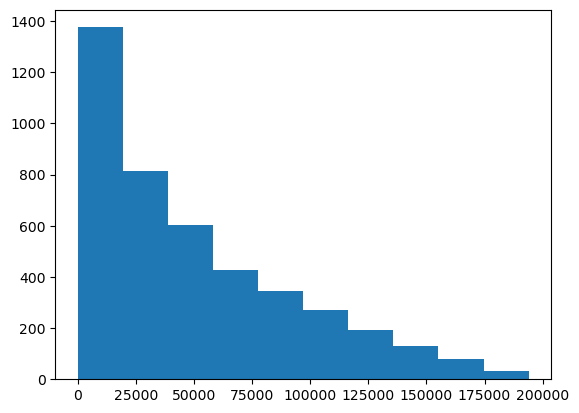

In [62]:
plt.hist(data["commercial_assets_value"])

The distribution is right-skewed, similar to the residential assets value, 
indicating most people have lower commercial asset values.

(array([557., 589., 579., 611., 574., 535., 383., 234., 144.,  63.]),
 array([  3000.,  41900.,  80800., 119700., 158600., 197500., 236400.,
        275300., 314200., 353100., 392000.]),
 <BarContainer object of 10 artists>)

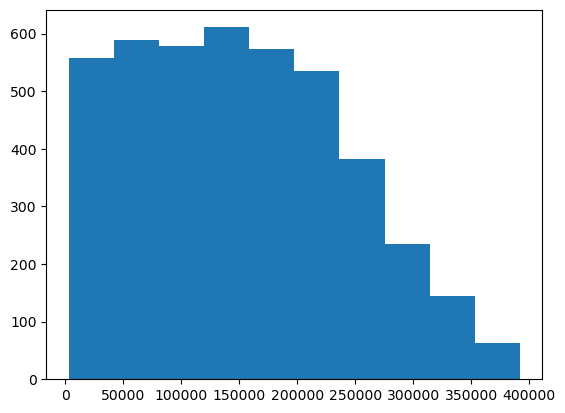

In [63]:
plt.hist(data["luxury_assets_value"])

This is another right-skewed distribution. 
A majority of the data points have lower luxury asset values.

(array([655., 695., 722., 666., 549., 378., 264., 201., 104.,  35.]),
 array([     0.,  14700.,  29400.,  44100.,  58800.,  73500.,  88200.,
        102900., 117600., 132300., 147000.]),
 <BarContainer object of 10 artists>)

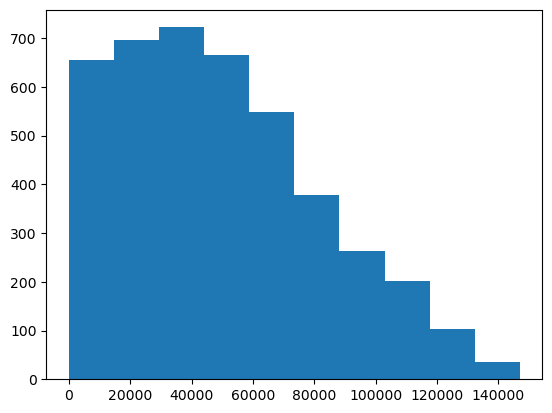

In [64]:
plt.hist(data["bank_asset_value"])

This is also right-skewed. Most of the individuals seem to have bank assets at the lower end of the scale.

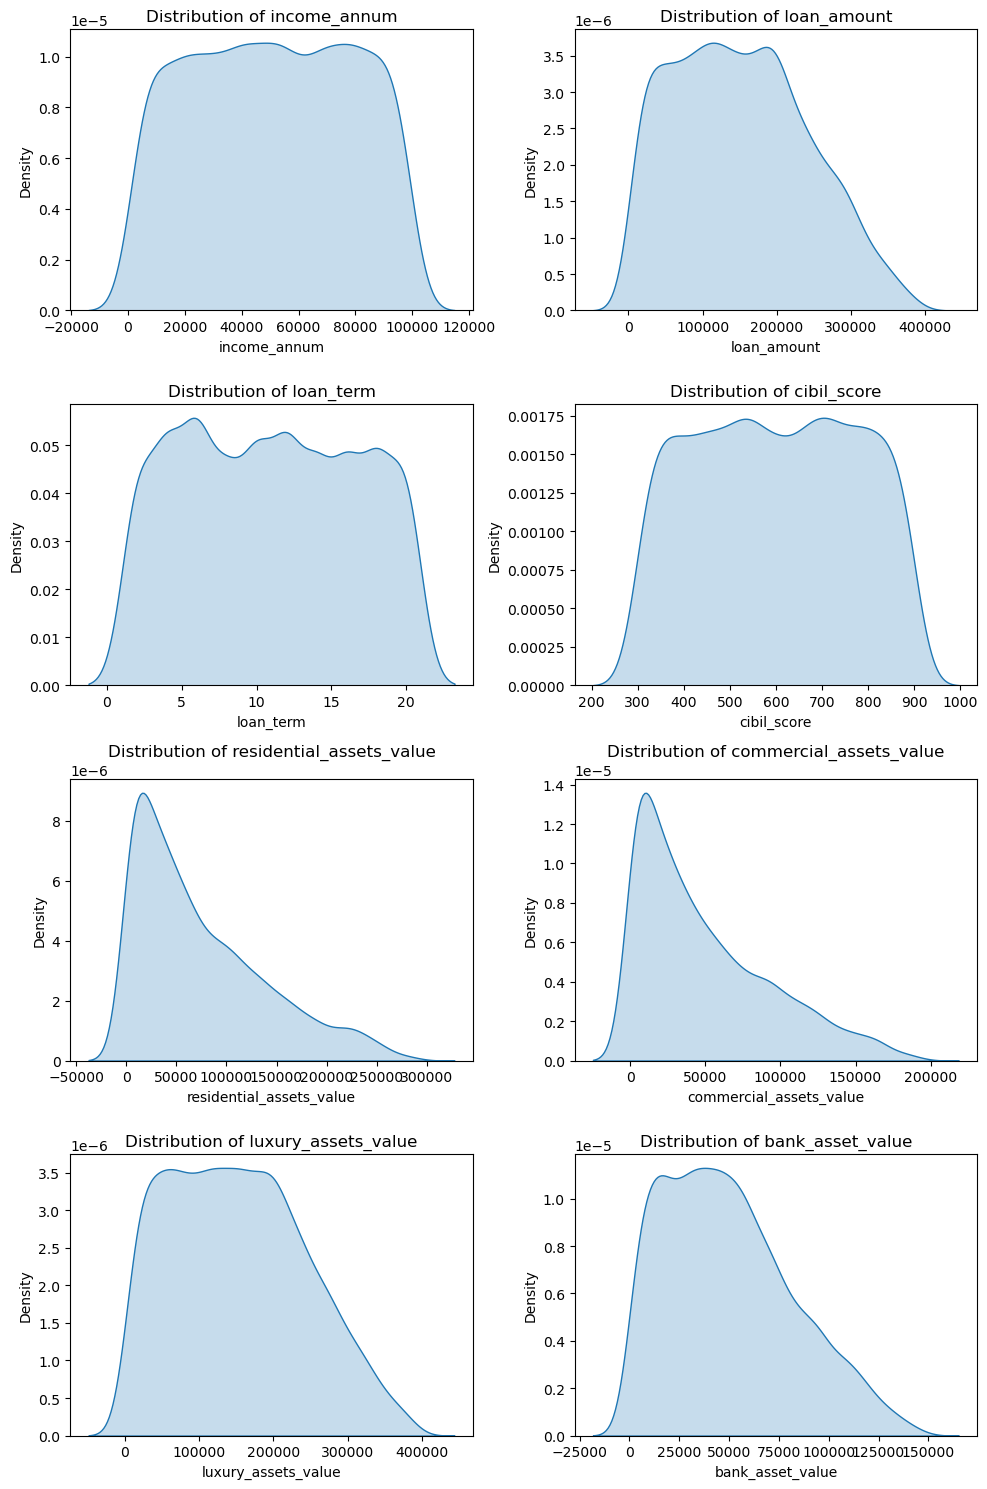

In [66]:
#  plots
numerical_cols = ["income_annum", "loan_amount", "loan_term", "cibil_score", 
                  "residential_assets_value", "commercial_assets_value", 
                  "luxury_assets_value", "bank_asset_value"]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))

for i, column_name in enumerate(numerical_cols):
    row = i // 2
    col = i % 2
    sns.kdeplot(data[column_name], ax=axes[row, col], fill=True)
    axes[row, col].set_title(f'Distribution of {column_name}')
    axes[row, col].set_xlabel(column_name)
    axes[row, col].set_ylabel('Density')

plt.tight_layout()
plt.show()

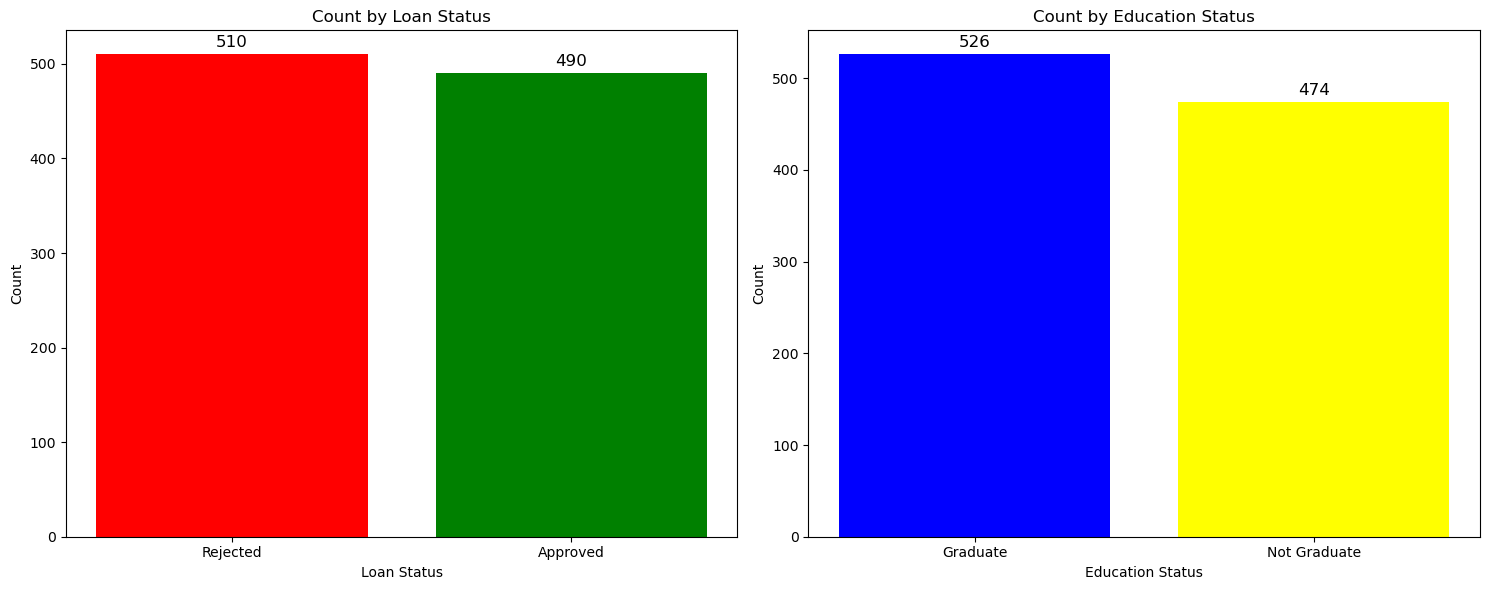

In [43]:
# Create a sample dataframe
np.random.seed(42)
data = pd.DataFrame({
    "loan_status": np.random.choice(['Approved', 'Rejected'], 1000),
    "education": np.random.choice(['Graduate', 'Not Graduate'], 1000)
})

# Setup the figure and axes
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot loan_status data
loan_status_counts = data["loan_status"].value_counts()
loan_status_labels = loan_status_counts.index
loan_status_values = loan_status_counts.values

axs[0].bar(loan_status_labels, loan_status_values, color=['red', 'green'])
axs[0].set_title('Count by Loan Status')
axs[0].set_xlabel('Loan Status')
axs[0].set_ylabel('Count')
for i, v in enumerate(loan_status_values):
    axs[0].text(i, v + 5, str(v), ha='center', fontsize=12, va='bottom')

# Plot education data
education_counts = data["education"].value_counts()
education_labels = education_counts.index
education_values = education_counts.values

axs[1].bar(education_labels, education_values, color=['blue', 'yellow'])
axs[1].set_title('Count by Education Status')
axs[1].set_xlabel('Education Status')
axs[1].set_ylabel('Count')
for i, v in enumerate(education_values):
    axs[1].text(i, v + 5, str(v), ha='center', fontsize=12, va='bottom')

# Display the plots
plt.tight_layout()
plt.show()